In [1]:
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import numpy as np
import random

## Stochastic simulation picks one path through the state. If this is run a number of times, that model might be more telling about the state of the system. 

ODEs assume high concentrations and availability of reactants and thus do not have the potential change that stochastic modeling has. 

Enter: **The chemical master equation (CME).** 

The CME models the probability that the system is in a state over time. This method of modeling essentially combines the ODE approach and the stochastic approach. We will use ODE integration to calculate the probabilities that singlular molecular models in stochatic modeling would end up settling in. 

Lets model a simple example. 

$$ { X + Y \xrightarrow{k_1} XY } $$

$$ {XY \xrightarrow{k_2} X + Y}$$

If you draw this out, there are three states that this reaction would be in. 

1.  #X = 3
    #Y = 2
    #XY = 0

2.  #X = 2
    #Y = 1
    #XY = 1
    
3.  #X = 1
    #Y = 0
    #XY = 2
    
    
To model this with a CME, we will define our propensities by multiplying their rate constant with the reactant(s). Also, for the sake of graphing a model that would be visually stimulating, we will set $k_1 = 5$ and $k_2 = 3$.

__Note__: when the species counts get high, using this method gets tough, and stochastic modeling/ODE integration would povide better information. 

To calculate the probability that a state is in a certain state, all we need to do is **calculate the probability that the system is moving into that state, and subtract the probabilities that the system is leaving that state!** Sound familiar? (hint, see ODE video)

The only thing is that now, since we are using probabilities, we must measure in that way, with nothing but a basis of propensity, which is calculated by multiplying the rate constant by the count of the molecules, and the probability that the state of the system was in that state before entering the current state ($P_i$). 

From above, the movement from...


$$ \large
\frac{dP_1}{dt} = k_{2}\cdot 1\cdot P_2 - k_1\cdot 3\cdot 2\cdot P_1 $$

$$ \large
\frac{dP_2}{dt} = k_1\cdot 3\cdot 2\cdot P_1 + k_{2}\cdot 2\cdot P_3 - k_1\cdot 2\cdot 1\cdot P_2 - k_{2}\cdot 1\cdot P_2 $$

$$ \large
\frac{dP_3}{dt} = k_1\cdot 2\cdot 1\cdot P_2 - k_{2}\cdot 2\cdot P_3 $$
   

In [2]:
def cme_funct(y, t, k1, k2): #km1 is the k minus 1 reversible rate of rxn
    return np.array([k2*y[1] - k1*6*y[0],  #this funciton will be used to pass into our integration of ODE
                     k1*6*y[0] + k2*2*y[2] - k1*2*y[1] - k2*y[1], 
                     k1*2*y[1] - k2*2*y[2]])

In [3]:
y0 = np.array([1,0,0]) #bcs we know the initial state of the function, thus the p that it is in that state is 1
k1 = 5
k2 = 3
ts = np.linspace(0, 2, 501)
res = integrate.odeint(cme_funct, y0, ts, args=(k1,k2))

In [4]:
p0 = res[:,0]
p1 = res[:,1]  
p2 = res[:,2]  #three outputs for the three possible states of the reaction
sumprobs = p0+p1+p2 # Sanity check; should sum to one at all times!

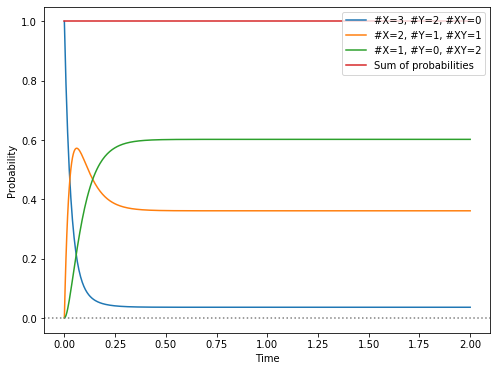

In [5]:
plt.figure(figsize=(8,6))
plt.plot(ts, p0, label='#X=3, #Y=2, #XY=0')
plt.plot(ts, p1, label='#X=2, #Y=1, #XY=1')
plt.plot(ts, p2, label='#X=1, #Y=0, #XY=2')
plt.plot(ts,sumprobs, label='Sum of probabilities')
plt.axhline(0, linestyle='dotted', color='grey')
plt.xlabel('Time')
plt.ylabel('Probability')
plt.legend()
plt.show()